[DEBUG] GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
[DEBUG] GPU memory growth enabled
[DEBUG] Loading dataset...
[DEBUG] Found 23708 files in dataset
[DEBUG] Processing image 0/23708
[DEBUG] Processing image 100/23708
[DEBUG] Processing image 200/23708
[DEBUG] Processing image 300/23708
[DEBUG] Processing image 400/23708
[DEBUG] Processing image 500/23708
[DEBUG] Processing image 600/23708
[DEBUG] Processing image 700/23708
[DEBUG] Processing image 800/23708
[DEBUG] Processing image 900/23708
[DEBUG] Processing image 1000/23708
[DEBUG] Processing image 1100/23708
[DEBUG] Processing image 1200/23708
[DEBUG] Processing image 1300/23708
[DEBUG] Processing image 1400/23708
[DEBUG] Processing image 1500/23708
[DEBUG] Processing image 1600/23708
[DEBUG] Processing image 1700/23708
[DEBUG] Processing image 1800/23708
[DEBUG] Processing image 1900/23708
[DEBUG] Processing image 2000/23708
[D

I0000 00:00:1729622673.194212      69 service.cc:145] XLA service 0x7e9ee800bbb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729622673.194285      69 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729622673.194291      69 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
W0000 00:00:1729622673.715928      69 random_ops.cc:59] Warning: Using tf.random.uniform with XLA compilation will ignore seeds; consider using tf.random.stateless_uniform instead if reproducible behavior is desired. StatefulPartitionedCall/random_uniform/RandomUniform
I0000 00:00:1729622743.844185      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


371/371 ━━━━━━━━━━━━━━━━━━━━ 540s 1s/step - d_loss: 1.1192 - feature_loss: 0.0850 - g_loss: 1.3168 - p_loss: 1.9146
Epoch 2/20
371/371 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - d_loss: 0.7541 - feature_loss: 0.0410 - g_loss: 0.9755 - p_loss: 1.9358
Epoch 3/20
371/371 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - d_loss: 0.7169 - feature_loss: 0.0324 - g_loss: 0.9713 - p_loss: 1.9705
Epoch 4/20
371/371 ━━━━━━━━━━━━━━━━━━━━ 398s 1s/step - d_loss: 0.8507 - feature_loss: 0.0281 - g_loss: 0.9051 - p_loss: 1.8693
Epoch 5/20
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - d_loss: 0.7145 - feature_loss: 0.0242 - g_loss: 0.9204 - p_loss: 1.7284

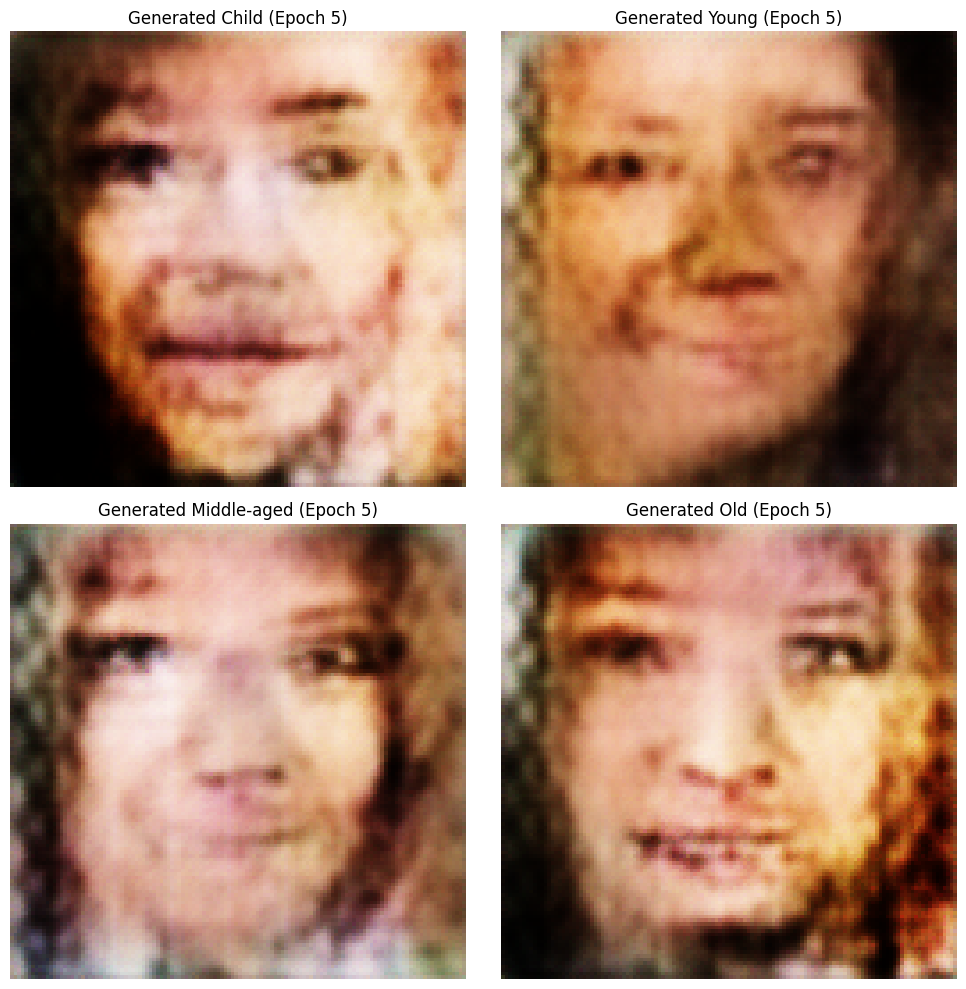

371/371 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - d_loss: 0.7144 - feature_loss: 0.0242 - g_loss: 0.9204 - p_loss: 1.7282
Epoch 6/20
371/371 ━━━━━━━━━━━━━━━━━━━━ 398s 1s/step - d_loss: 0.6801 - feature_loss: 0.0275 - g_loss: 0.9967 - p_loss: 1.7414
Epoch 7/20
371/371 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - d_loss: 0.7017 - feature_loss: 0.0255 - g_loss: 1.0006 - p_loss: 1.6845
Epoch 8/20
371/371 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - d_loss: 0.6341 - feature_loss: 0.0336 - g_loss: 1.0080 - p_loss: 1.6813
Epoch 9/20
371/371 ━━━━━━━━━━━━━━━━━━━━ 398s 1s/step - d_loss: 0.6389 - feature_loss: 0.0449 - g_loss: 1.0471 - p_loss: 1.6522
Epoch 10/20
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - d_loss: 0.6178 - feature_loss: 0.0500 - g_loss: 1.0438 - p_loss: 1.6332

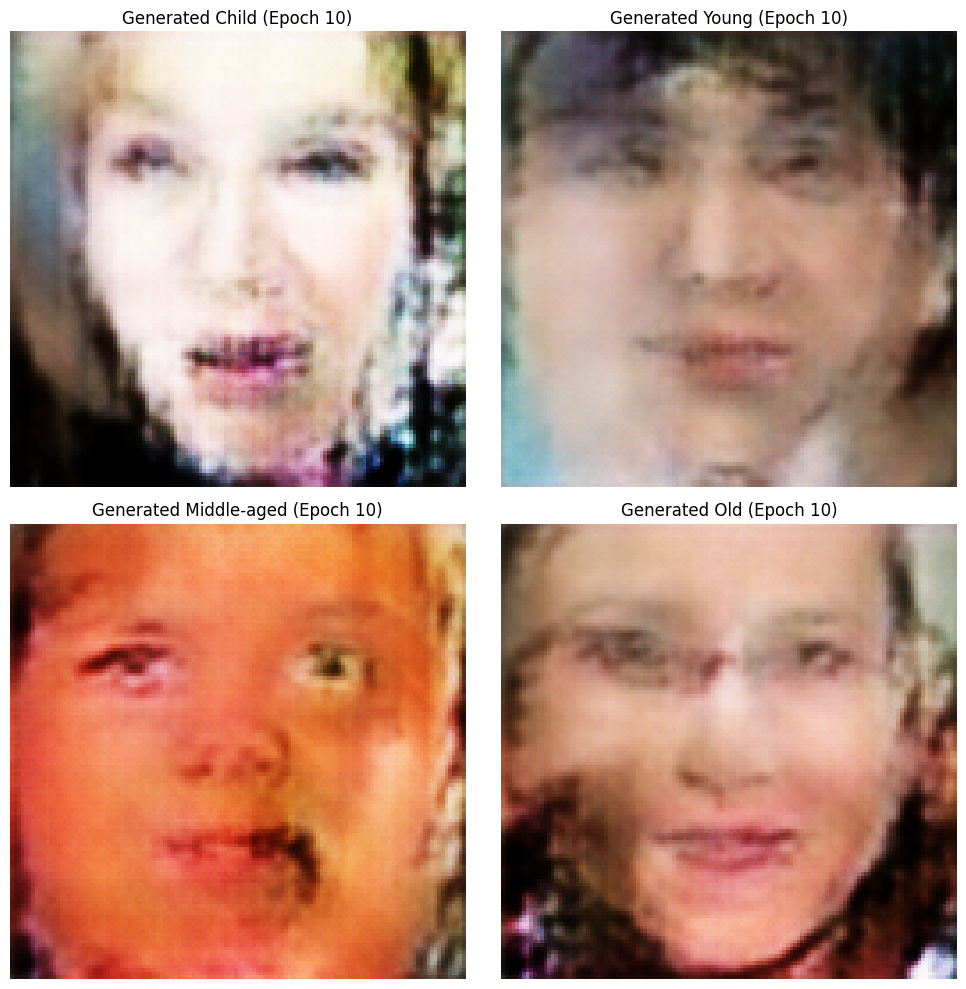

371/371 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - d_loss: 0.6177 - feature_loss: 0.0500 - g_loss: 1.0432 - p_loss: 1.6329
Epoch 11/20
371/371 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - d_loss: 0.5883 - feature_loss: 0.0592 - g_loss: 1.0908 - p_loss: 1.6299
Epoch 12/20
371/371 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - d_loss: 0.5873 - feature_loss: 0.0637 - g_loss: 1.1179 - p_loss: 1.6136
[DEBUG] Saving final models...
[DEBUG] Generating final images...


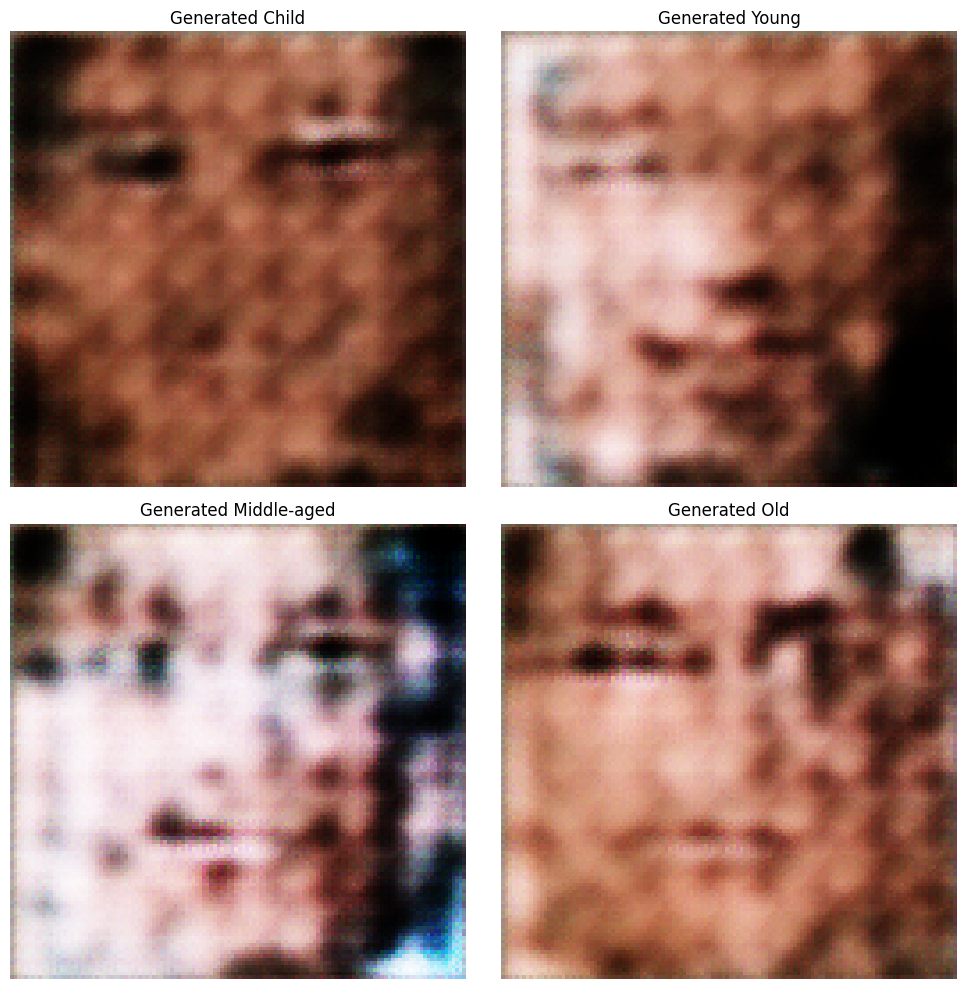

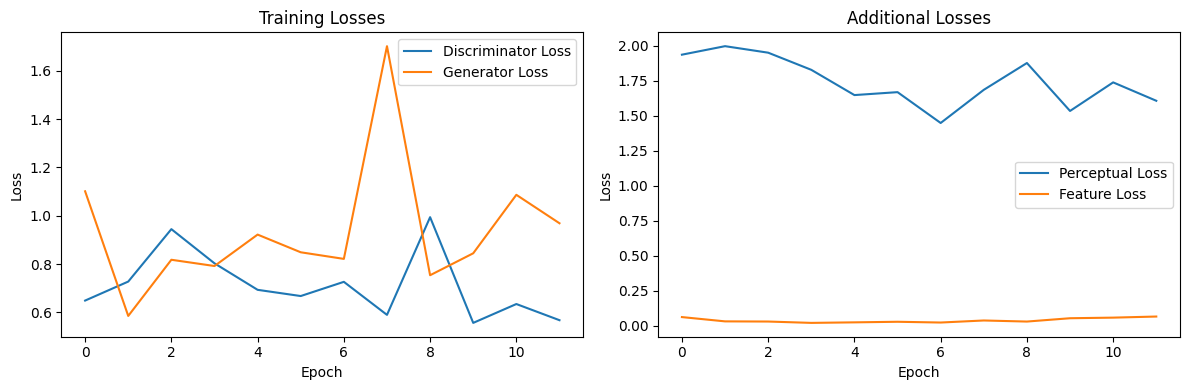

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2

# Enable debug mode
DEBUG = True

# Dataset directory (update with your dataset path)
DATASET_PATH = '/kaggle/input/utkface-new/UTKFace'  # Update this path

def debug_print(*args, **kwargs):
    if DEBUG:
        print("[DEBUG]", *args, **kwargs)

def load_images(dataset_path, img_size=(128, 128)):
    images = []
    labels = []
    
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"Dataset path {dataset_path} does not exist!")
    
    files = glob(os.path.join(dataset_path, '*.jpg'))
    if not files:
        raise ValueError(f"No jpg files found in {dataset_path}")
    
    debug_print(f"Found {len(files)} files in dataset")
    
    for i, filepath in enumerate(files):
        try:
            if i % 100 == 0:
                debug_print(f"Processing image {i}/{len(files)}")
                
            img = cv2.imread(filepath)
            if img is None:
                debug_print(f"Failed to load image: {filepath}")
                continue
                
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size)
            img = img.astype(np.float32)
            
            # Enhanced augmentation
            img = tf.image.random_brightness(img, 0.2)
            img = tf.image.random_contrast(img, 0.8, 1.2)
            img = tf.image.random_saturation(img, 0.8, 1.2)
            
            img = img / 127.5 - 1
            
            filename = os.path.basename(filepath)
            try:
                age = int(filename.split('_')[0])
            except (IndexError, ValueError):
                debug_print(f"Failed to extract age from filename: {filename}")
                continue
            
            if age <= 12:
                label = 0  # Child
            elif age <= 30:
                label = 1  # Young
            elif age <= 50:
                label = 2  # Middle-aged
            else:
                label = 3  # Old
                
            images.append(img)
            labels.append(label)
            
        except Exception as e:
            debug_print(f"Error processing {filepath}: {str(e)}")
            continue
    
    if not images:
        raise ValueError("No valid images were loaded!")
    
    debug_print(f"Successfully loaded {len(images)} images")
    return np.array(images), np.array(labels)

def attention_block(x, filters):
    gamma = tf.Variable(0.0, trainable=True)
    batch_size, height, width, channels = x.shape
    
    f = layers.Conv2D(filters // 8, 1, padding='same')(x)
    g = layers.Conv2D(filters // 8, 1, padding='same')(x)
    h = layers.Conv2D(filters, 1, padding='same')(x)
    
    f = tf.reshape(f, [batch_size, height * width, filters // 8])
    g = tf.reshape(g, [batch_size, height * width, filters // 8])
    h = tf.reshape(h, [batch_size, height * width, filters])
    
    s = tf.matmul(g, f, transpose_b=True)
    beta = tf.nn.softmax(s)
    
    o = tf.matmul(beta, h)
    o = tf.reshape(o, [batch_size, height, width, filters])
    
    return gamma * o + x

class AttentionBlock(tf.keras.layers.Layer):
    def __init__(self, filters):
        super(AttentionBlock, self).__init__()
        self.filters = filters
        self.gamma = tf.Variable(0.0, trainable=True)
        self.query_conv = layers.Conv2D(filters // 8, 1, padding='same')
        self.key_conv = layers.Conv2D(filters // 8, 1, padding='same')
        self.value_conv = layers.Conv2D(filters, 1, padding='same')

    def call(self, x):
        batch_size, height, width, channels = tf.shape(x)
        
        f = self.query_conv(x)
        g = self.key_conv(x)
        h = self.value_conv(x)
        
        f = tf.reshape(f, [batch_size, -1, self.filters // 8])
        g = tf.reshape(g, [batch_size, -1, self.filters // 8])
        h = tf.reshape(h, [batch_size, -1, self.filters])
        
        s = tf.matmul(g, f, transpose_b=True)
        beta = tf.nn.softmax(s)
        
        o = tf.matmul(beta, h)
        o = tf.reshape(o, [batch_size, height, width, self.filters])
        
        return self.gamma * o + x

class AttentionBlock(tf.keras.layers.Layer):
    def __init__(self, filters):
        super(AttentionBlock, self).__init__()
        self.filters = filters
        self.gamma = tf.Variable(0.0, trainable=True)
        self.query_conv = layers.Conv2D(filters // 8, 1, padding='same')
        self.key_conv = layers.Conv2D(filters // 8, 1, padding='same')
        self.value_conv = layers.Conv2D(filters, 1, padding='same')

    def call(self, inputs):
        # Get spatial dimensions
        batch_size = tf.shape(inputs)[0]
        height = tf.shape(inputs)[1]
        width = tf.shape(inputs)[2]
        
        # Compute query, key, value
        query = self.query_conv(inputs)  # (B, H, W, C//8)
        key = self.key_conv(inputs)      # (B, H, W, C//8)
        value = self.value_conv(inputs)  # (B, H, W, C)
        
        # Reshape for attention computation
        query_reshaped = tf.reshape(query, [batch_size, -1, self.filters // 8])  # (B, HW, C//8)
        key_reshaped = tf.reshape(key, [batch_size, -1, self.filters // 8])      # (B, HW, C//8)
        value_reshaped = tf.reshape(value, [batch_size, -1, self.filters])       # (B, HW, C)
        
        # Compute attention scores
        attention = tf.matmul(query_reshaped, key_reshaped, transpose_b=True)    # (B, HW, HW)
        attention = tf.nn.softmax(attention, axis=-1)
        
        # Apply attention to value
        context = tf.matmul(attention, value_reshaped)                           # (B, HW, C)
        context = tf.reshape(context, [batch_size, height, width, self.filters]) # (B, H, W, C)
        
        # Apply gamma and residual connection
        output = self.gamma * context + inputs
        
        return output

def build_generator():
    noise_input = layers.Input(shape=(100,))
    label_input = layers.Input(shape=(4,))
    
    x = layers.Concatenate()([noise_input, label_input])
    
    x = layers.Dense(8*8*512, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(0.2)(x)
    
    x = layers.Reshape((8, 8, 512))(x)
    
    x = layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(0.2)(x)
    x = AttentionBlock(256)(x)
    
    x = layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(0.2)(x)
    x = AttentionBlock(128)(x)
    
    x = layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(0.2)(x)
    
    x = layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', activation='tanh')(x)
    
    model = tf.keras.Model(inputs=[noise_input, label_input], outputs=x)
    return model

def build_discriminator():
    input_img = layers.Input(shape=(128, 128, 3))
    
    x = layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same')(input_img)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dropout(0.3)(x)
    x = AttentionBlock(128)(x)
    
    x = layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dropout(0.3)(x)
    x = AttentionBlock(256)(x)
    
    x = layers.Conv2D(512, (5, 5), strides=(2, 2), padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dropout(0.3)(x)
    
    features = layers.Flatten()(x)
    output = layers.Dense(1)(features)
    
    model = tf.keras.Model(inputs=input_img, outputs=[output, features])
    return model

class ConditionalGAN(tf.keras.Model):
    def __init__(self, generator, discriminator):
        super(ConditionalGAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator
        
        try:
            self.vgg = VGG16(include_top=False, input_shape=(128, 128, 3))
            for layer in self.vgg.layers:
                layer.trainable = False
        except Exception as e:
            debug_print(f"Error initializing VGG16: {str(e)}")
            raise
        
        self.loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    def compile(self, g_optimizer, d_optimizer):
        super(ConditionalGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer

    def gradient_penalty(self, real_images, fake_images):
        alpha = tf.random.uniform([tf.shape(real_images)[0], 1, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        interpolated = real_images + alpha * diff
        
        with tf.GradientTape() as tape:
            tape.watch(interpolated)
            pred, _ = self.discriminator(interpolated, training=True)
        
        gradients = tape.gradient(pred, interpolated)
        slopes = tf.sqrt(tf.reduce_sum(tf.square(gradients), axis=[1, 2, 3]))
        return tf.reduce_mean(tf.square(slopes - 1.0))

    def perceptual_loss_fn(self, real_img, fake_img):
        try:
            real_img = (real_img + 1) * 127.5
            fake_img = (fake_img + 1) * 127.5
            
            real_img = tf.keras.applications.vgg16.preprocess_input(real_img)
            fake_img = tf.keras.applications.vgg16.preprocess_input(fake_img)
            
            real_features = self.vgg(real_img)
            fake_features = self.vgg(fake_img)
            
            return tf.reduce_mean(tf.abs(real_features - fake_features))
        except Exception as e:
            debug_print(f"Error in perceptual loss calculation: {str(e)}")
            return 0.0

    @tf.function
    def train_step(self, data):
        real_images, labels = data
        batch_size = tf.shape(real_images)[0]
        
        random_noise = tf.random.normal([batch_size, 100])
        labels_one_hot = tf.one_hot(labels, depth=4)
        
        # Train discriminator
        with tf.GradientTape() as tape:
            fake_images = self.generator([random_noise, labels_one_hot], training=True)
            
            real_output, real_features = self.discriminator(real_images, training=True)
            fake_output, fake_features = self.discriminator(fake_images, training=True)
            
            d_loss_real = self.loss_fn(tf.ones_like(real_output), real_output)
            d_loss_fake = self.loss_fn(tf.zeros_like(fake_output), fake_output)
            gp = self.gradient_penalty(real_images, fake_images)
            
            d_loss = (d_loss_real + d_loss_fake) * 0.5 + 10.0 * gp
            
        d_grads = tape.gradient(d_loss, self.discriminator.trainable_variables)
        self.d_optimizer.apply_gradients(zip(d_grads, self.discriminator.trainable_variables))
        
        # Train generator
        with tf.GradientTape() as tape:
            fake_images = self.generator([random_noise, labels_one_hot], training=True)
            fake_output, fake_features = self.discriminator(fake_images, training=True)
            
            g_loss = self.loss_fn(tf.ones_like(fake_output), fake_output)
            p_loss = self.perceptual_loss_fn(real_images, fake_images)
            
            # Feature matching loss
            _, real_features = self.discriminator(real_images, training=False)
            feature_loss = tf.reduce_mean(tf.abs(real_features - fake_features))
            
            total_g_loss = g_loss + 0.1 * p_loss + 0.1 * feature_loss
        
        g_grads = tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(zip(g_grads, self.generator.trainable_variables))
        
        return {
            "d_loss": d_loss,
            "g_loss": g_loss,
            "p_loss": p_loss,
            "feature_loss": feature_loss
        }

def plot_generated_images(model, epoch=None):
    noise = tf.random.normal([4, 100])
    labels = tf.one_hot(range(4), depth=4)
    
    generated_images = model.generator([noise, labels], training=False)
    generated_images = (generated_images + 1) / 2.0
    
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(generated_images[i])
        plt.axis('off')
        age_category = ['Child', 'Young', 'Middle-aged', 'Old'][i]
        title = f'Generated {age_category}'
        if epoch is not None:
            title += f' (Epoch {epoch})'
        plt.title(title)
    plt.tight_layout()
    plt.show()

def main():
    try:
        debug_print("GPU Available:", tf.config.list_physical_devices('GPU'))
        
        gpus = tf.config.experimental.list_physical_devices('GPU')
        if gpus:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            debug_print("GPU memory growth enabled")
        
        debug_print("Loading dataset...")
        images, labels = load_images(DATASET_PATH)
        debug_print(f"Dataset shapes - Images: {images.shape}, Labels: {labels.shape}")
        
        CHECKPOINT_DIR = "/kaggle/working/"
        os.makedirs(CHECKPOINT_DIR, exist_ok=True)
        
        debug_print("Building models...")
        generator = build_generator()
        discriminator = build_discriminator()
        cgan = ConditionalGAN(generator, discriminator)
        
        debug_print("Compiling model...")
        cgan.compile(
            g_optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
            d_optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)
        )
        
        BATCH_SIZE = 64
        EPOCHS = 20
        
        debug_print("Preparing dataset...")
        dataset = tf.data.Dataset.from_tensor_slices((images, labels))
        dataset = dataset.shuffle(buffer_size=min(len(images), 10000))
        dataset = dataset.batch(BATCH_SIZE)
        dataset = dataset.prefetch(tf.data.AUTOTUNE)
        
        checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=os.path.join(CHECKPOINT_DIR, "cgan_model_{epoch:02d}.weights.h5"),
            save_weights_only=True,
            monitor="g_loss",
            mode="min",
            save_best_only=True
        )
        
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='g_loss',
            patience=10,
            restore_best_weights=True,
            mode='min'
        )
        
        class GenerateImagesCallback(tf.keras.callbacks.Callback):
            def on_epoch_end(self, epoch, logs=None):
                if (epoch + 1) % 5 == 0:
                    plot_generated_images(self.model, epoch + 1)
        
        debug_print("Starting training...")
        history = cgan.fit(
            dataset,
            epochs=EPOCHS,
            callbacks=[
                checkpoint_callback,
                early_stopping,
                GenerateImagesCallback()
            ],
            verbose=1
        )
        
        debug_print("Saving final models...")
        generator.save(os.path.join(CHECKPOINT_DIR, 'final_generator.keras'))
        discriminator.save(os.path.join(CHECKPOINT_DIR, 'final_discriminator.keras'))
        
        debug_print("Generating final images...")
        plot_generated_images(cgan)
        
        # Plot training history
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['d_loss'], label='Discriminator Loss')
        plt.plot(history.history['g_loss'], label='Generator Loss')
        plt.title('Training Losses')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['p_loss'], label='Perceptual Loss')
        plt.plot(history.history['feature_loss'], label='Feature Loss')
        plt.title('Additional Losses')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        return history
        
    except Exception as e:
        debug_print(f"An error occurred in main(): {str(e)}")
        raise

if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        debug_print(f"Fatal error: {str(e)}")